In [47]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
df =  pd.DataFrame({'value':[32,63,94,25,63], 'numb':[8,5,5,8,5], 'name':['asf','praje','wrwer','qwre','sadf']})
print(df)

    name  numb  value
0    asf     8     32
1  praje     5     63
2  wrwer     5     94
3   qwre     8     25
4   sadf     5     63


In [3]:
#As soon as you call df.set_index() on a particular column, it would become an index of the df.
index = df.set_index(['numb','value'])

In [4]:
print(index)

             name
numb value       
8    32       asf
5    63     praje
     94     wrwer
8    25      qwre
5    63      sadf


In [5]:
print(index.sort_index())

             name
numb value       
5    63     praje
     63      sadf
     94     wrwer
8    25      qwre
     32       asf


In [6]:
index.loc[5,63]

C:\Prajeen\_Workstation\Anaconda\lib\site-packages\ipykernel\__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


name
numb value       
5    63     praje
     63      sadf

In [7]:
print(index.reset_index())

   numb  value   name
0     8     32    asf
1     5     63  praje
2     5     94  wrwer
3     8     25   qwre
4     5     63   sadf


In [8]:
# Raw slicing
index.loc[5]

,name
value,
63,praje
94,wrwer
63,sadf


In [9]:
index2 = df.set_index(['value',[7,8,9,1,5]])
print(index2)

          name  numb
value               
32    7    asf     8
63    8  praje     5
94    9  wrwer     5
25    1   qwre     8
63    5   sadf     5


In [10]:
index3 = df.set_index([[7,8,9,1,6]])
print(index3)

    name  numb  value
7    asf     8     32
8  praje     5     63
9  wrwer     5     94
1   qwre     8     25
6   sadf     5     63


In [11]:
index4 = df.set_index(['value'])
print(index4)

        name  numb
value             
32       asf     8
63     praje     5
94     wrwer     5
25      qwre     8
63      sadf     5


In [12]:
''' 
============= Documentation ================
Ultimately * on any array object will give you values in that array in the form of a list
1D array will be convered to content
2D array will be converted to list of 1D array
3D array will be converted to list of 2D array
============================================
'''
ar = [['one','two','three'],['rum','tum','num']]
print(ar)
print(list(zip(*ar)))

din = ['one','two','three']
tin = ['rum','tum','num']
print(list(zip(din,tin)))

num = [[[2,3,5],[6,7,9]]]
print(num)
tum = list(*num)
print(*num)
print(tum)
print(*tum)
print(*[2,3,4])

[['one', 'two', 'three'], ['rum', 'tum', 'num']]
[('one', 'rum'), ('two', 'tum'), ('three', 'num')]
[('one', 'rum'), ('two', 'tum'), ('three', 'num')]
[[[2, 3, 5], [6, 7, 9]]]
[[2, 3, 5], [6, 7, 9]]
[[2, 3, 5], [6, 7, 9]]
[2, 3, 5] [6, 7, 9]
2 3 4


In [13]:
num = [[[2,3,5],[6,7,9]]]
print(*num)

[[2, 3, 5], [6, 7, 9]]


### Documentation
use the following links for details on indexing 

http://tomaugspurger.github.io/modern-1.html
http://tomaugspurger.github.io/modern-3-indexes.html

This link explains the performance optimization using indexes. examples of using set_index, reset_index, reindex etc
http://tomaugspurger.github.io/modern-4-performance.html


Pandas documentation on indexing (advanced) -> https://pandas.pydata.org/pandas-docs/stable/advanced.html
another indexing doc - Essential -> https://pandas.pydata.org/pandas-docs/stable/basics.html

Pandas cookbook - very good documentation. 
go to 'modern pandas' -> http://pandas.pydata.org/pandasdocs/stable/tutorials.html#pandas-cookbook


In [26]:
#merging of dataframes / similar to joingin of SQL tables

df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df3 = pd.DataFrame([['a', 'asdf'], ['b', 'asf']], columns=['letter', 'animal'])
print(df1)
print(df3)
final = df1.merge(df3, on=['letter'], how='left')
print(final)

  letter  number
0      a       1
1      b       2
  letter animal
0      a   asdf
1      b    asf
  letter  number animal
0      a       1   asdf
1      b       2    asf


In [41]:
# even if you have same column values, merging will create another column
df2 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.merge(df2, on=['letter'], how='left')

,letter,number_x,number_y
0,a,1,1
1,b,2,2


In [32]:
#iterating through rows of the DF
ind, row = next(final.iterrows())
print(ind)
print(row)

0
letter       a
number       1
animal    asdf
Name: 0, dtype: object


In [35]:
#iterating through rows of the DF
for ind, row in final.iterrows():
    print(ind)
    print(row)
    print(row['animal'])

0
letter       a
number       1
animal    asdf
Name: 0, dtype: object
asdf
1
letter      b
number      2
animal    asf
Name: 1, dtype: object
asf


In [42]:
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

In [51]:
df.corr()

,a,b,c,d
a,1.000000,0.814015,-0.941949,0.014498
b,0.814015,1.000000,-0.765614,0.007863
c,-0.941949,-0.765614,1.000000,-0.002344
d,0.014498,0.007863,-0.002344,1.000000


In [55]:
np.corrcoef(df, df)

array([[1.        , 0.28919558, 0.77572437, ..., 0.18918963, 0.14453458,
        0.56843827],
       [0.28919558, 1.        , 0.32256391, ..., 0.95080902, 0.93765335,
        0.90099654],
       [0.77572437, 0.32256391, 1.        , ..., 0.05817021, 0.00801177,
        0.33861939],
       ...,
       [0.18918963, 0.95080902, 0.05817021, ..., 1.        , 0.99869341,
        0.91419151],
       [0.14453458, 0.93765335, 0.00801177, ..., 0.99869341, 1.        ,
        0.89585763],
       [0.56843827, 0.90099654, 0.33861939, ..., 0.91419151, 0.89585763,
        1.        ]])

# Note
if correlation is needed to be done for all the columns in the data frame, we should use the pandas APIs. Numpy require columns to be given as inputs

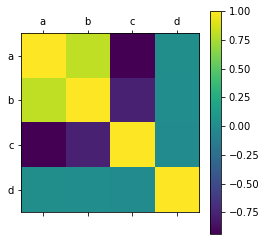

In [50]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [60]:
df = pd.DataFrame({'A': [1, 1, 2, 2], 'B': [1, 2, 3, 4],'C': np.random.randn(4)})
df

,A,B,C
0,1,1,0.265948
1,1,2,-0.585936
2,2,3,-0.465499
3,2,4,0.972207


In [61]:
df.groupby('A').agg('sum')

,B,C
A,,
1,3,-0.319988
2,7,0.506708


In [62]:
df.A.value_counts()

2    2
1    2
Name: A, dtype: int64